In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal

Import all time arrays from the txt files.
Last element is removed as a time is always appended to the file with a comma at the end

In [2]:
basicTime4Deterministic = np.genfromtxt('timeBasicDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeTranspostion4Deterministic = np.genfromtxt('timeTranspositionDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeMoveOrdering4Deterministic = np.genfromtxt('timeMoveOrderingDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeTranspostionMoveOrdering4Deterministic = np.genfromtxt('timeTranspositionMoveOrderingDepth4Deterministictrue.txt', dtype=float, delimiter=',')[:-1]

basicTime4Stochastic = np.genfromtxt('timeBasicDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeTranspostion4Stochastic = np.genfromtxt('timeTranspositionDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeMoveOrdering4Stochastic = np.genfromtxt('timeMoveOrderingDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeTranspostionMoveOrdering4Stochastic = np.genfromtxt('timeTranspositionMoveOrderingDepth4Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]

In [3]:
basicTime2Deterministic = np.genfromtxt('timeBasicDepth2Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeTranspostion2Deterministic = np.genfromtxt('timeTranspositionDepth2Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeMoveOrdering2Deterministic = np.genfromtxt('timeMoveOrderingDepth2Deterministictrue.txt', dtype=float, delimiter=',')[:-1]
timeTranspostionMoveOrdering2Deterministic = np.genfromtxt('timeTranspositionMoveOrderingDepth2Deterministictrue.txt', dtype=float, delimiter=',')[:-1]

basicTime2Stochastic = np.genfromtxt('timeBasicDepth2Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeTranspostion2Stochastic = np.genfromtxt('timeTranspositionDepth2Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeMoveOrdering2Stochastic = np.genfromtxt('timeMoveOrderingDepth2Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]
timeTranspostionMoveOrdering2Stochastic = np.genfromtxt('timeTranspositionMoveOrderingDepth2Deterministicfalse.txt', dtype=float, delimiter=',')[:-1]


# Comparisons at Depth 4 Deterministic

Using mann whitney u to compare various configurations
We set an Alpha of 0.05 for this.

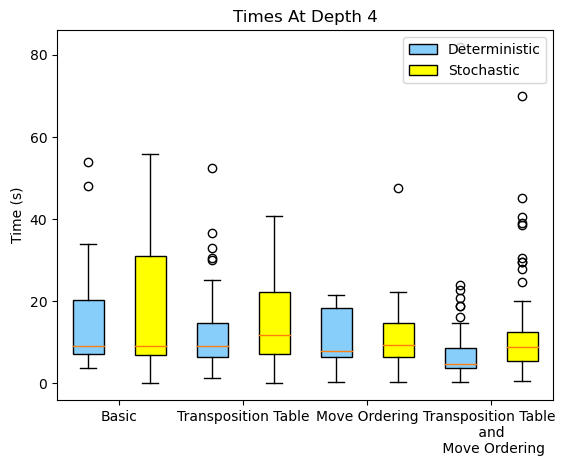

In [17]:
plt.figure()
labels = ['Basic', 'Transposition Table', 'Move Ordering', 'Transposition Table \n and \n Move Ordering']
all_data = [basicTime4Deterministic, basicTime4Stochastic, timeTranspostion4Deterministic, timeTranspostion4Stochastic, timeMoveOrdering4Deterministic, timeMoveOrdering4Stochastic, timeTranspostionMoveOrdering4Deterministic, timeTranspostionMoveOrdering4Stochastic]
bplot1 = plt.boxplot(all_data, patch_artist=True)
colors = ['lightskyblue', 'yellow', 'lightskyblue', 'yellow', 'lightskyblue', 'yellow', 'lightskyblue', 'yellow']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
#Set x-axis labels
plt.xticks([1.5, 3.5, 5.5, 7.5], labels)
#Add legend

plt.legend([bplot1["boxes"][0], bplot1["boxes"][1]], ['Deterministic', 'Stochastic'], loc='upper right')

plt.ylabel('Time (s)')
plt.title('Times At Depth 4')

#Save the figure
plt.savefig('timesDepth4.png', bbox_inches='tight')
plt.show()




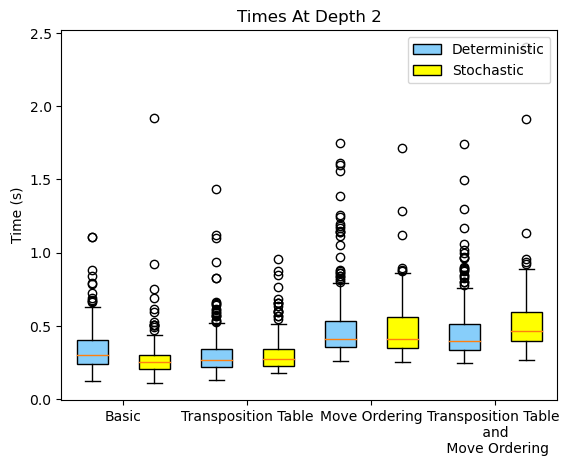

In [15]:
plt.figure()
labels = ['Basic', 'Transposition Table', 'Move Ordering', 'Transposition Table \n and \n Move Ordering']
all_data = [basicTime2Deterministic, basicTime2Stochastic, timeTranspostion2Deterministic, timeTranspostion2Stochastic, timeMoveOrdering2Deterministic, timeMoveOrdering2Stochastic, timeTranspostionMoveOrdering2Deterministic, timeTranspostionMoveOrdering2Stochastic]
bplot1 = plt.boxplot(all_data, patch_artist=True)
colors = ['lightskyblue', 'yellow', 'lightskyblue', 'yellow', 'lightskyblue', 'yellow', 'lightskyblue', 'yellow']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
#Set x-axis labels
plt.xticks([1.5, 3.5, 5.5, 7.5], labels)
#Add legend

plt.legend([bplot1["boxes"][0], bplot1["boxes"][1]], ['Deterministic', 'Stochastic'], loc='upper right')


plt.ylabel('Time (s)')
plt.title('Times At Depth 2')

#Save the figure
plt.savefig('timeDepth2.png', bbox_inches='tight')
plt.show()




In [7]:
mannwhitneyu(timeTranspostion4Deterministic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=3062.0, pvalue=0.04325492467758234)

As p < Alpha we reject the null hypothesis and accept that using a transposition table in the case of a Depth of 4 and using a determinisitc simulation provides a statisticlly significant time improvement

In [36]:
mannwhitneyu(timeMoveOrdering4Deterministic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=1378.0, pvalue=0.029023027895720352)

As p < Alpha we reject the null hypothesis and accept that using move ordering in the case of a Depth of 4 and using a determinisitc simulation provides a statisticlly significant time improvement

In [37]:
mannwhitneyu(timeTranspostionMoveOrdering4Deterministic, timeTranspostion4Deterministic, alternative='less')

MannwhitneyuResult(statistic=4415.5, pvalue=1.5269142703794018e-10)

In [38]:
mannwhitneyu(timeTranspostionMoveOrdering4Deterministic, timeMoveOrdering4Deterministic, alternative='less')

MannwhitneyuResult(statistic=2148.0, pvalue=1.2249691427946014e-06)

As p < Alpha in both cases we reject the null hypthesis and accept that using both move ordering and a transposition table in the case of a Depth of 4 and using a deterministic simulaiton provides a statistically significant time improved over using either a transposition table or move ordering individually

# Comparisons at Depth 4 Stochastic

In [48]:
#Get median values
print(np.median(basicTime4Deterministic))
print(np.median(timeTranspostion4Deterministic))
print(np.median(timeMoveOrdering4Deterministic))
print(np.median(timeTranspostionMoveOrdering4Deterministic))



9.136
8.986
7.93
4.641


In [49]:
#Get average values
print(np.mean(basicTime4Deterministic))
print(np.mean(timeTranspostion4Deterministic))
print(np.mean(timeMoveOrdering4Deterministic))
print(np.mean(timeTranspostionMoveOrdering4Deterministic))


14.440117647058825
11.656529411764707
10.846731707317073
6.57266497461929


In [51]:
mannwhitneyu(timeTranspostion4Deterministic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=3062.0, pvalue=0.04325492467758234)

In [53]:
mannwhitneyu(timeMoveOrdering4Deterministic, basicTime4Deterministic, alternative='less')   

MannwhitneyuResult(statistic=1378.0, pvalue=0.029023027895720352)

In [54]:
mannwhitneyu(timeTranspostionMoveOrdering4Deterministic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=3372.0, pvalue=8.844932174420172e-16)

In [55]:
#Get median values stochastic
print(np.median(basicTime4Stochastic))
print(np.median(timeTranspostion4Stochastic))
print(np.median(timeMoveOrdering4Stochastic))
print(np.median(timeTranspostionMoveOrdering4Stochastic))


9.183499999999999
11.721499999999999
9.3735
8.848


In [56]:
#Get average values stochastic
print(np.mean(basicTime4Stochastic))
print(np.mean(timeTranspostion4Stochastic))
print(np.mean(timeMoveOrdering4Stochastic))
print(np.mean(timeTranspostionMoveOrdering4Stochastic))


17.91016666666667
14.71728846153846
11.092250000000003
11.8084


In [57]:
mannwhitneyu(timeTranspostion4Stochastic, basicTime4Stochastic, alternative='less')

MannwhitneyuResult(statistic=1350.0, pvalue=0.36764133583755293)

In [58]:
mannwhitneyu(timeMoveOrdering4Stochastic, basicTime4Stochastic, alternative='less')

MannwhitneyuResult(statistic=823.0, pvalue=0.1106532583971297)

In [59]:
mannwhitneyu(timeTranspostionMoveOrdering4Stochastic, basicTime4Stochastic, alternative='less')

MannwhitneyuResult(statistic=1813.0, pvalue=0.01872913226153532)

In [8]:
mannwhitneyu(basicTime4Stochastic, basicTime4Deterministic, alternative='two-sided')

MannwhitneyuResult(statistic=2362.0, pvalue=0.7738285405864233)

In comparing deterministic and stochastic simulation with all other settings equal using a two tailed hypothesis we see a p > Alpha and fail to reject to null hypothesis. This makes sense as including 'randomness' in the simulation should not be very computationally intensive.

In [9]:
mannwhitneyu(timeTranspostion4Stochastic, basicTime4Stochastic, alternative='less')

MannwhitneyuResult(statistic=1350.0, pvalue=0.36764133583755293)

Maybe need more data but as of now p > Alpha so we fail to reject the null hypothesis and cannot determine if a transposition table provides a statistically significant time improvement

In [12]:
mannwhitneyu(timeMoveOrdering4Stochastic, basicTime4Stochastic, alternative='less')

MannwhitneyuResult(statistic=823.0, pvalue=0.1106532583971297)

Maybe need more data but as of now p > Alpha so we fail to reject the null hypothesis and cannot determine if move ordering provides a statistically significant time improvement

In [15]:
mannwhitneyu(timeTranspostionMoveOrdering4Stochastic, timeTranspostion4Stochastic, alternative='less')

MannwhitneyuResult(statistic=1773.0, pvalue=0.026428707650760216)

From this we can determine that move ordering provides signigicant benefit using stochastic simualtion but using a transposition table does not. This makes sense as using stochastic simualtion reduces the chances to encounter the same state from multiple branches.

In [10]:
mannwhitneyu(timeTranspostionMoveOrdering4Stochastic, basicTime4Deterministic, alternative='less')

MannwhitneyuResult(statistic=2851.0, pvalue=0.008853386080643509)

In [11]:
kruskal(basicTime4Deterministic, timeTranspostion4Deterministic, timeTranspostionMoveOrdering4Deterministic)

KruskalResult(statistic=80.52902406027962, pvalue=3.2609535211215838e-18)

Comparison at Depth 2

In [42]:
#Get median values
print(np.median(basicTime2Deterministic))
print(np.median(timeTranspostion2Deterministic))
print(np.median(timeMoveOrdering2Deterministic))
print(np.median(timeTranspostionMoveOrdering2Deterministic))

0.302
0.2695
0.41
0.399


In [40]:
#Get average values
print(np.mean(basicTime2Deterministic))
print(np.mean(timeTranspostion2Deterministic))
print(np.mean(timeMoveOrdering2Deterministic))
print(np.mean(timeTranspostionMoveOrdering2Deterministic))


0.3522905027932961
0.3045388888888889
0.4957555555555556
0.46087205387205393


In [43]:
#Get median values stochastic
print(np.median(basicTime2Stochastic))
print(np.median(timeTranspostion2Stochastic))
print(np.median(timeMoveOrdering2Stochastic))
print(np.median(timeTranspostionMoveOrdering2Stochastic))


0.252
0.271
0.41
0.4685


In [44]:
#Get average values stochastic
print(np.mean(basicTime2Stochastic))
print(np.mean(timeTranspostion2Stochastic))
print(np.mean(timeMoveOrdering2Stochastic))
print(np.mean(timeTranspostionMoveOrdering2Stochastic))

0.27705058365758756
0.31168421052631584
0.4729861591695502
0.5233006993006992


In [26]:
mannwhitneyu(timeTranspostion2Deterministic, basicTime2Deterministic, alternative='less')

MannwhitneyuResult(statistic=25559.0, pvalue=4.588656962417789e-05)

In [27]:
mannwhitneyu(timeMoveOrdering2Deterministic, basicTime2Deterministic, alternative='less')

MannwhitneyuResult(statistic=36373.0, pvalue=1.0)

In [39]:
mannwhitneyu(timeTranspostionMoveOrdering2Deterministic, basicTime2Deterministic, alternative='less')

MannwhitneyuResult(statistic=38054.5, pvalue=0.9999999999999986)

In [45]:
#Now stochastic
mannwhitneyu(timeTranspostion2Stochastic, basicTime2Stochastic, alternative='less')

MannwhitneyuResult(statistic=32264.5, pvalue=0.9999083280242939)

In [46]:
mannwhitneyu(timeMoveOrdering2Stochastic, basicTime2Stochastic, alternative='less')

MannwhitneyuResult(statistic=66664.0, pvalue=1.0)

In [47]:
mannwhitneyu(timeTranspostionMoveOrdering2Stochastic, basicTime2Stochastic, alternative='less')

MannwhitneyuResult(statistic=68635.5, pvalue=1.0)